<a href="https://colab.research.google.com/github/pursh2002/Machine-learning-with-Siraj-Raval-sept-2019..-Dr-Purshottam/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Stock Prediction

The homework for this week is to build 3 different types of regression lines to predict stock prices using Python, then print out the prediction for the best performing one.

**Step 1** - Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL  

**Step 2** - Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date. See this https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7  as an example and the scikit learn docs to see all the different types of regression models you can easily build (i.e quadratic, linear, lasso, ridge, etc.)

**Step 3** - Visualize your result using matplotlib or another plotting library of your choice

Once your code is complete, upload it to GitHub and send the github link to gradedhomeworkassignments@gmail.com with your full name as the subject line.  Good luck!

## Step 1: Download stock prices from Yahoo Finance

First we'll connect and authenticate Drive.  This will allow us to save our results directly to Google Drive.

In [0]:
# drive to connect with Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# change directory to folder you want to save files
%cd "/content/drive/My Drive/Colab Notebooks/Make Money with Machine Learning Course"

/content/drive/My Drive/Colab Notebooks/Make Money with Machine Learning Course


Next, we import some common tools for data processing and visualizations.

In [0]:
# numpy for matrix math & data pre-processing
import numpy as np

# pandas for data formatting
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Next, we'll install and import a couple of tools to help us access Yahoo Finance and read them directly into pandas.

In [0]:
# yfinance library to access yahoo finance
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=caba6ebe397cb827d82ec547ebbc6927a643baef95e3dbab8c848152f0c95105
  Stored in directory: /tmp/pip-ephem-wheel-cache-vkmov54t/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
# pdr for reading csv files
from pandas_datareader import data as pdr
# yf for reading into pandas
import fix_yahoo_finance as yf

# override pandas datareader
yf.pdr_override()

For this homework assignment I decided to choose the S&P 500 (^GSPC) index.  We will grab data from the beginning of 2018 to now.

In [0]:
# read stock ticker data into a data frame, reset the index
ticker = '^GSPC'

dataframe = pdr.get_data_yahoo(ticker, start='2010-01-01').reset_index()
dataframe.to_csv(ticker + ".csv", index=False)

[*********************100%***********************]  1 of 1 downloaded


The previous code block may return a `ValueError: zero-size array...` if we reach the query limit of 2,000 calls per hour.  Luckily, we saved the csv to our Drive folder!  Run the following block to retrieve our csv from Google Drive.

In [0]:
dataframe = pd.read_csv(ticker + ".csv")

Let's preview the first 5 lines:

In [0]:
# display first 5 rows
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


So it looks like we have the `Date`, the price the stock `Open`ed at, the `High` for the day, the `Low` for the day, the price the stock `Close`d at, and the `Volume` of trades for the day.

The `Adj Close` is the [closing price after adjustments for applicable splits and dividend distributions.](https://help.yahoo.com/kb/SLN28256.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAJh0n2Hm8FNdMS6st1eDjVCJv2GA1yBEYXtryrFngTRxXWqdFSnjY7Q1dXiLMopqjBRYej1O_4idlnELsxpsPPxVI2OihltyG_scon1Rsw7sjTxcX2SwmHHb1O76tKUd2-8bktaM6qfoXZrdqT-IiLC8cIXnyz2RLuAgxUVBrK-p)

Let's also check if there is any missing data:

In [0]:
# summary of dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 7 columns):
Date         2442 non-null object
Open         2442 non-null float64
High         2442 non-null float64
Low          2442 non-null float64
Close        2442 non-null float64
Adj Close    2442 non-null float64
Volume       2442 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 133.6+ KB


And get a numerical summary of our columns:

In [0]:
# numerical summary of dataframe
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2.442000e+03
mean,1928.613419,1937.784541,1918.677536,1929.056023,1929.056023,3.720499e+09
std,564.774703,565.977919,563.267171,564.601897,564.601897,8.180540e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,1022.580017,3.824615e+08
25%,1369.574951,1376.255035,1363.842529,1369.787506,1369.787506,3.236955e+09
50%,1965.145019,1976.800049,1955.695007,1967.269959,1967.269959,3.598105e+09
75%,2371.212585,2378.690064,2362.930054,2371.887574,2371.887574,4.084508e+09
max,3024.469971,3027.979980,3014.300049,3025.860107,3025.860107,1.061781e+10


We will drop all the pricing columns and only leave the Adj Close and Volume columns.

Before we visualize our data, let's split our data into it's training and testing data sets in the following section.

This is best practice to not prevent unconscious bias to our results.

In [0]:
dataframe.drop(['Open', 'High', 'Low', 'Close'], axis = 1, inplace = True)

In [0]:
# add technical indicators
dataframe['MA 9'] = dataframe['Adj Close'].rolling(9).mean().shift()
dataframe['MA 21'] = dataframe['Adj Close'].rolling(21).mean().shift()
dataframe['Change'] = np.log( dataframe['Adj Close'] / dataframe['Adj Close'].shift() )
dataframe['Volatility'] = dataframe.Change.rolling(21).std().shift()

In [0]:
# backfill missing values from moving averages
dataframe.dropna(axis = 0, inplace = True)

In [0]:
# preview
dataframe.head(30)

,Date,Adj Close,Volume,MA 9,MA 21,Change,Volatility
22,2010-02-04,1063.109985,5859690000,1091.822225,1119.278570,-0.031636,0.010256
23,2010-02-05,1066.189941,6438900000,1088.638889,1115.782854,0.002893,0.012106
24,2010-02-08,1056.739990,4089820000,1085.239990,1112.404279,-0.008903,0.012153
25,2010-02-09,1070.520020,5114260000,1081.303317,1108.359043,0.012956,0.012104
26,2010-02-10,1068.130005,4251450000,1078.305542,1104.813331,-0.002235,0.012568
27,2010-02-11,1078.469971,4400870000,1076.483317,1101.058570,0.009634,0.012520
28,2010-02-12,1075.510010,4160680000,1076.994425,1098.308570,-0.002748,0.012749
29,2010-02-16,1094.869995,4080770000,1075.474433,1094.967140,0.017841,0.012508
30,2010-02-17,1099.510010,4259230000,1074.535550,1092.415237,0.004229,0.013272
31,2010-02-18,1106.750000,3878620000,1074.783325,1090.676188,0.006563,0.013191


In [0]:
dataframe.to_csv(ticker + "_prepared.csv", index=False)

## Step 2: Use Linear Regression to predict prices for a future date.

### Prepare Data for Machine Learning Algorithms

For each Linear Regression model, we'll read in a clean copy of the data:

In [0]:
# read in a copy of csv and convert Date from string to datetime
df_full = pd.read_csv(ticker + "_prepared.csv", parse_dates=['Date'])

To prepare the data for our machine learning algorithm, we'll convert `Date` column from a `datetime` datatype to an integer.

In [0]:
# import datetime to convert date to ordinal
import datetime as dt

df_full['Date'] = df_full['Date'].apply(lambda x: x.toordinal())

We can use the following line of code later if we need to convert the date back into a `datetime`.

In [0]:
# to convert back to datetime
# df_full['Date'].apply(dt.datetime.fromordinal)

Next, we'll separate our data features (X) from the value we want to predict aka labels (y).  Since the columns for High, Low, and Close are essentially the answers were trying to predict... we will drop those columns.

We will only provide the Date and Volume for our model to predict the price of the stock.

In [0]:
X = df_full.drop('Adj Close', axis = 1)

In [0]:
y = df_full['Adj Close']

Next, we'll separate the data into a 90/10 ratio for our training and testing data set:

In [0]:
# testing ratio of 90%
train_ratio = 0.90

# training size
train_size = int(len(X) * train_ratio)

In [0]:
# split X and y into training and testing sets
X_train, X_test = X.loc[:train_size-1], X.loc[train_size:]
y_train, y_test = y.loc[:train_size-1], y.loc[train_size:]

Now that our data is separated, let's plot our training and test set.

*Note: it is best practice not to peak at your test set; in production you wouldn't be able to peak at your data!*

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


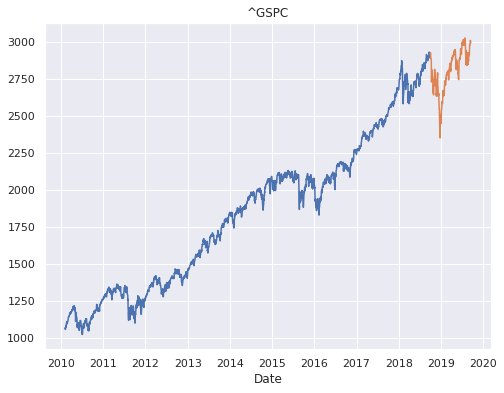

In [0]:
# create plot with dimension 8 x 6
f, ax = plt.subplots(figsize=(8,6))

# plot the dataframe, Date as x axis, Adj Close as y axis
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train.values)
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test.values)
plt.title(ticker);

## Training and Evaluation

First up... we'll use a basic linear regression model:

In [0]:
from sklearn.linear_model import LinearRegression

# LinearRegression constructor
lin_reg = LinearRegression()

# fit the training data and training labels
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's view some of our data and see how the model did:

In [0]:
# view 5 instances of the training data and labels
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

# print the results
print('Predictions: ', lin_reg.predict(some_data))
print('Labels: ', list(some_labels))

Predictions:  [1028.44333277 1071.63220488 1064.71799926 1086.16663998 1066.77310391]
Labels:  [1063.109985, 1066.189941, 1056.73999, 1070.52002, 1068.130005]


Interesting... the first few rows look ok but it looks like it is diverging.

For a more robust look, let's measure the regression model's Root Mean Squared Error (RMSE) for the whole training set using Scikit-Learn's `mean_squared_error` function.

In [0]:
from sklearn.metrics import mean_squared_error

# predict the value of the stock using the prepared features
y_preds = lin_reg.predict(X_train)

# calculate error from training labels and predictions
lin_mse = mean_squared_error(y_train, y_preds)

# take the square root
lin_rmse = np.sqrt(lin_mse)
lin_rmse

22.36635814200372

Hmmm... thats not bad considering the current price of the S&P is around 3,000.  Let's try and visualize what the model is suggesting.

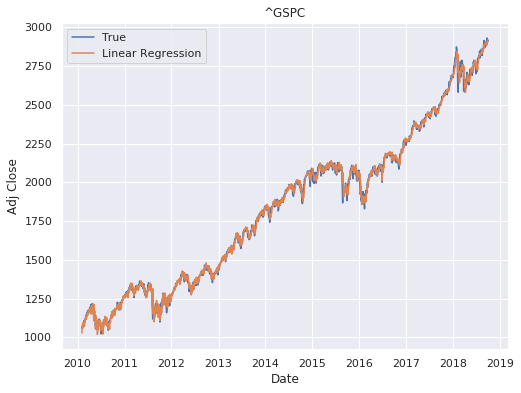

In [0]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'True')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_preds, label = 'Linear Regression')
plt.title(ticker);

Well... it looks like our model is just drawing a straight line through the whole dataset!  Let's try another model before moving into more evaluation:

In [0]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree constructor
tree_reg = DecisionTreeRegressor()

# fit the prepared stock data and prices
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
# predict the stock prices using our decision tree model
price_preds = tree_reg.predict(X_train)

# calculate the error from the price and predictions
tree_mse = mean_squared_error(y_train, price_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

An error of 0!  It looks like our decision tree model is also overfitting our data badly!  To get a better understanding of what's happening, let's use some of Scikit-Learn's cross-validation features.

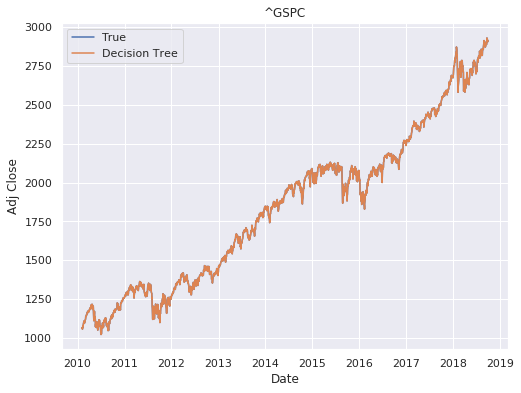

In [0]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'True')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = price_preds, label = 'Decision Tree')
plt.title(ticker);

Indeed it is completely overlapping our training data!

## Cross Validation
Since classical cross-validation techniques will choose random testing and validation sets, we will need to consider the time series effects on our data.

Luckily, Scikit-Learn has the `TimeSeriesSplit` tool to help us do exactly that.  It is a varation on the *k-fold* cross-validation technique that uses subsequent folds as testing sets.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0101.png)

In [0]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# create 10 sequential splits from the training data
tscv = TimeSeriesSplit(n_splits = 5)

# calculate MSE scores
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = tscv)

# take square root
lin_reg_rmse_scores = np.sqrt(-lin_scores)

In [0]:
# function to display scores
def display_scores(scores):
  print('Scores: ', scores)
  print('Mean: ', scores.mean())
  print('Standard Deviation: ', scores.std())

# show linear regression scores
display_scores(lin_reg_rmse_scores)

Scores:  [22.30242125 27.64273297 26.25267352 22.22916496 29.17474237]
Mean:  25.520347013420327
Standard Deviation:  2.813622405613907


Let's see how our decision tree compares:

In [0]:
# calculate MSE scores
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = tscv)

# take square root
tree_reg_rmse_scores = np.sqrt(-tree_scores)

# show decision tree scores
display_scores(tree_reg_rmse_scores)

Scores:  [ 81.11633284 300.52622073 125.95239762 125.42437031 321.9258436 ]
Mean:  190.98903301924398
Standard Deviation:  99.74301282894476


Our decision tree is actually performing worse than our Linear Regression!

Lastly, let's try an Elastic Net model to introduce regularization and better generalization to our predictions:

In [0]:
from sklearn.linear_model import ElasticNet

# training elastic net model
elastic_net = ElasticNet(alpha = .11, l1_ratio = .5)
elastic_net.fit(X_train, y_train)

# evaluate scores
elastic_scores = cross_val_score(elastic_net, X_train, y_train, scoring = 'neg_mean_squared_error', cv = tscv)
elastic_rmse_scores = np.sqrt(-elastic_scores)

training_preds = elastic_net.predict(X_train)

# display scores
display_scores(elastic_rmse_scores)

Scores:  [25.95408083 28.27506099 30.05244534 25.73888743 33.46755609]
Mean:  28.697606137358605
Standard Deviation:  2.865222636196036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 730888.1000163552, tolerance: 55401.22002628373
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260386.65991920166, tolerance: 6120.2883475959625
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421177.1300754072, tolerance: 16770.80757398765
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 541107.2862050

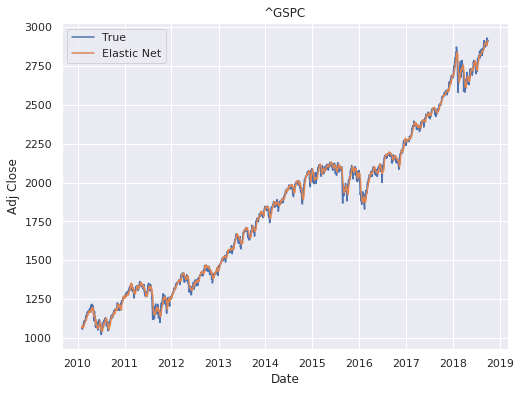

In [0]:
# plot
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'True')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = training_preds, label = 'Elastic Net')
plt.title(ticker);

It looks like our models aren't doing better than our Linear Regression Model!



# Evaluate the Model

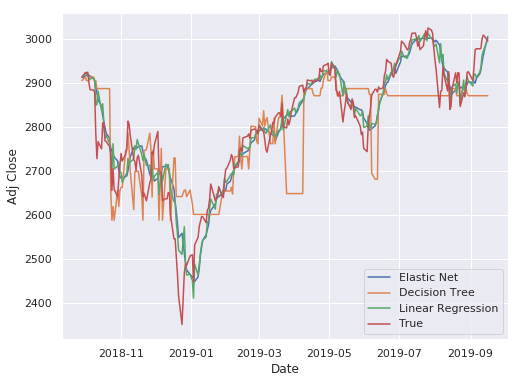

In [0]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = elastic_net.predict(X_test), label = 'Elastic Net')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = tree_reg.predict(X_test), label = 'Decision Tree')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = lin_reg.predict(X_test), label = 'Linear Regression')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test, label = 'True')

# Auto ML

In [0]:
!pip install tpot

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 153kB 8.1MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=c6a1a12af67b3a8f2bcbbb070b1d75a22ecb360466b268842aa397203be2ac3d
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [0]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations = 100, population_size = 100, verbosity = 2, cv = tscv, max_eval_time_mins = 480, n_jobs = -1)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_fitted_pipeline.py')

29 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 58.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Date', 'Volume', 'MA 9', 'MA 21', 'Change', 'Volatility'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5']
expected Change, Date, MA 9, Volatility, Volume, MA 21 in input data
training data did not have the following fields: f0, f1, f4, f3, f5, f2.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 1 - Current Pareto front scores:
-1	-628.4744283004435	LassoLarsCV(input_matrix, LassoLarsCV__normalize=False)

_pre_test decorator: _random_mutation_operator: num_test=0 

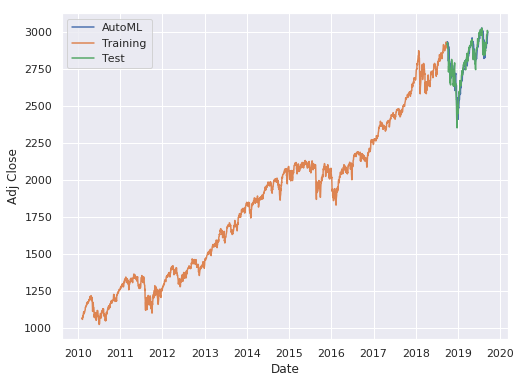

In [0]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = tpot.fitted_pipeline_.predict(X_test), label = 'AutoML')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'Training')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test, label = 'Test')

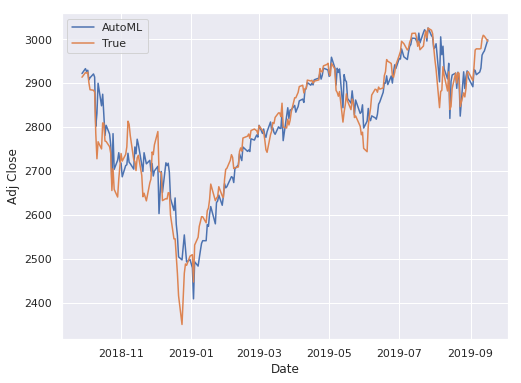

In [0]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = tpot.fitted_pipeline_.predict(X_test), label = 'AutoML')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test, label = 'Test')

In [0]:
tpot.fitted_pipeline_.score(X_test, y_test)

0.9063961648776213